# Objective Values (Delay, Throughput) vs Alpha

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF_PATH = 'dataframes/demand_vs_alpha/'

In [19]:
df = pd.read_pickle(DF_PATH + 'results.pkl')

## Combining the dataframes

In [4]:
dflist = []

for i in range(450,1801,50):
    dflist.append(pd.read_pickle(DF_PATH + 'results/results_vs_alpha_d{}_b0.pkl'.format(i)))

In [5]:
df = pd.concat(dflist)

In [7]:
df.to_pickle(DF_PATH + 'results.pkl')

In [16]:
df.head()

,demand,runtime,delay,throughput,alpha,flow_weight
0,450,4.113032,1086.886076,44.556962,0.000,0
1,450,97.208230,861.240506,44.556962,0.125,0
2,450,113.829416,861.240506,44.556962,0.250,0
3,450,138.198439,861.240506,44.556962,0.375,0
4,450,149.478604,861.240506,44.556962,0.500,0


## Checking how delay changes

Text(0.5,0.98,'Heatmap of total delay (in seconds)')

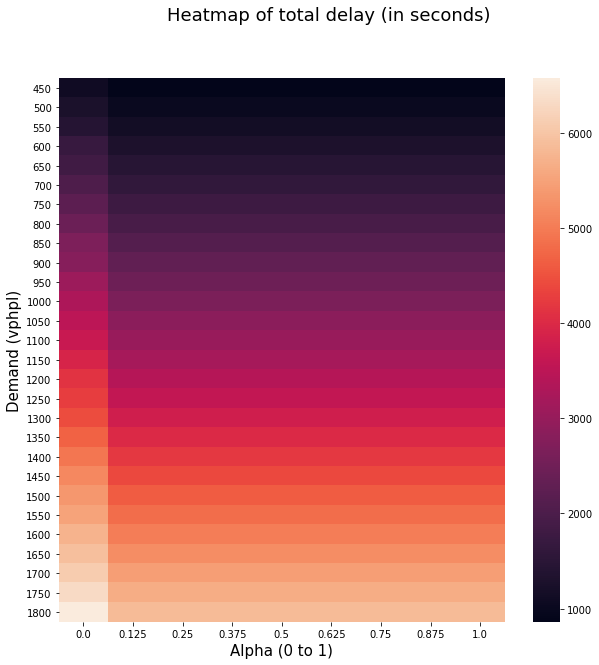

In [13]:
df_delay_map = df.pivot(index='demand', columns='alpha', values='delay')

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data=df_delay_map, ax=ax)
ax.set_xlabel("Alpha (0 to 1)", fontsize=15)
ax.set_ylabel("Demand (vphpl)", fontsize=15)
fig.suptitle("Heatmap of total delay (in seconds)", fontsize=18)

Text(0,0.5,'Delay (seconds)')

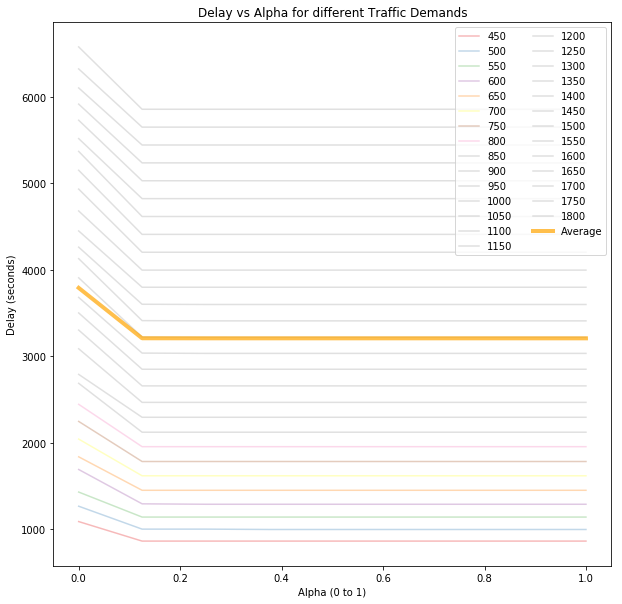

In [12]:
palette = plt.get_cmap('Set1')
df_delay_transpose = df_delay_map.transpose()
df_delay_avg = df_delay_transpose.mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(10,10))

num=0
for column in df_delay_transpose:
    plt.plot(df_delay_transpose.index, df_delay_transpose[column], marker='', color=palette(num), linewidth=1.5, alpha=0.3, label=column)
    num+=1
    
plt.plot(df_delay_avg.index, df_delay_avg.values, marker='', color='orange', linewidth=4, alpha=0.7, label='Average')
    
# Add legend
plt.legend(loc=1, ncol=2)

# Add titles
plt.title("Delay vs Alpha for different Traffic Demands")
plt.xlabel("Alpha (0 to 1)")
plt.ylabel("Delay (seconds)")

## Checking how throughput changes

Text(0.5,0.98,'Heatmap of total Throughput (in vehicles)')

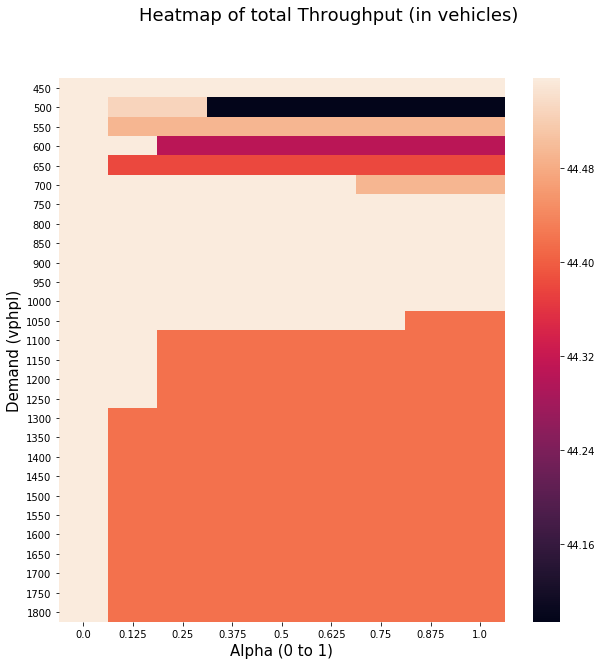

In [14]:
df_throughput_map = df.pivot(index='demand', columns='alpha', values='throughput')

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data=df_throughput_map, ax=ax)
ax.set_xlabel("Alpha (0 to 1)", fontsize=15)
ax.set_ylabel("Demand (vphpl)", fontsize=15)
fig.suptitle("Heatmap of total Throughput (in vehicles)", fontsize=18)

Text(0,0.5,'Throughput (vehicles)')

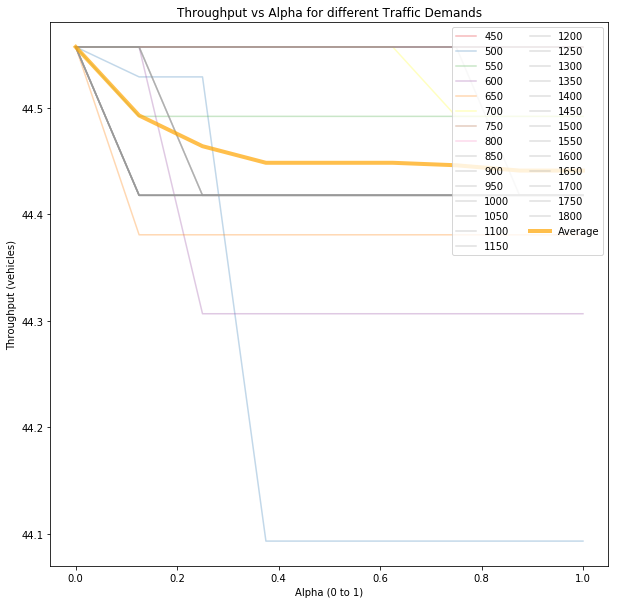

In [15]:
palette = plt.get_cmap('Set1')
df_throughput_transpose = df_throughput_map.transpose()
df_throughput_avg = df_throughput_transpose.mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(10,10))

num=0
for column in df_throughput_transpose:
    plt.plot(df_throughput_transpose.index, df_throughput_transpose[column], marker='', color=palette(num), linewidth=1.5, alpha=0.3, label=column)
    num+=1
    
plt.plot(df_throughput_avg.index, df_throughput_avg.values, marker='', color='orange', linewidth=4, alpha=0.7, label='Average')
    
# Add legend
plt.legend(loc=1, ncol=2)

# Add titles
plt.title("Throughput vs Alpha for different Traffic Demands")
plt.xlabel("Alpha (0 to 1)")
plt.ylabel("Throughput (vehicles)")

## Checking how runtime changes

Text(0.5,0.98,'Heatmap of CPLEX Runtime (in seconds)')

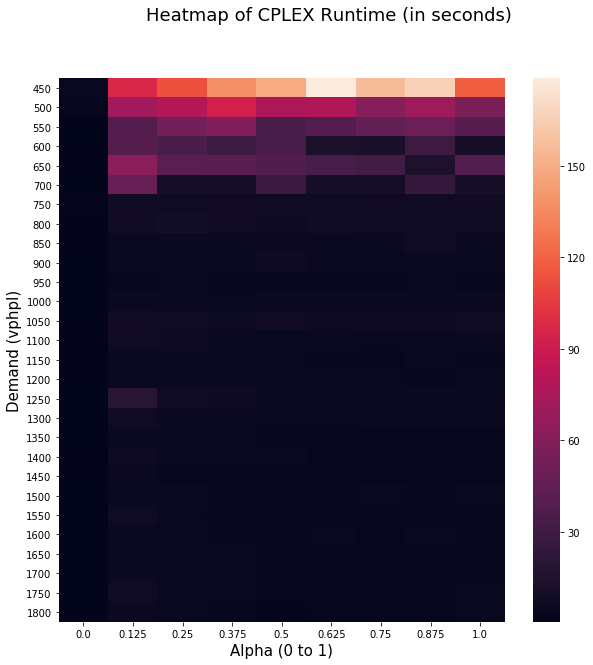

In [17]:
df_runtime_map = df.pivot(index='demand', columns='alpha', values='runtime')

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data=df_runtime_map, ax=ax)
ax.set_xlabel("Alpha (0 to 1)", fontsize=15)
ax.set_ylabel("Demand (vphpl)", fontsize=15)
fig.suptitle("Heatmap of CPLEX Runtime (in seconds)", fontsize=18)

Text(0,0.5,'Runtime (seconds)')

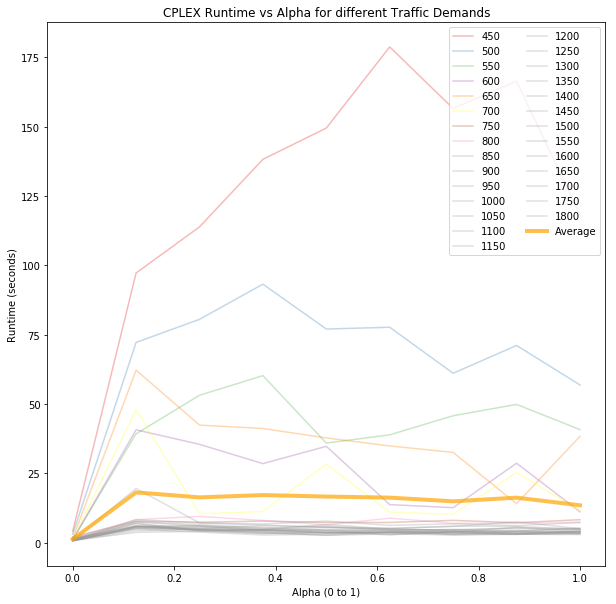

In [18]:
palette = plt.get_cmap('Set1')
df_runtime_transpose = df_runtime_map.transpose()
df_runtime_avg = df_runtime_transpose.mean(axis=1)

fig, ax = plt.subplots(1,1,figsize=(10,10))

num=0
for column in df_runtime_transpose:
    plt.plot(df_runtime_transpose.index, df_runtime_transpose[column], marker='', color=palette(num), linewidth=1.5, alpha=0.3, label=column)
    num+=1
    
plt.plot(df_runtime_avg.index, df_runtime_avg.values, marker='', color='orange', linewidth=4, alpha=0.7, label='Average')
    
# Add legend
plt.legend(loc=1, ncol=2)

# Add titles
plt.title("CPLEX Runtime vs Alpha for different Traffic Demands")
plt.xlabel("Alpha (0 to 1)")
plt.ylabel("Runtime (seconds)")